In [3]:
import awkward as ak
import matplotlib.pyplot as plt
import os

In [13]:
columns = ['msoftdrop',
           'trigger_mask',
           'btag_count',
           'pt',
           'num_fatjets',
          ]

In [50]:
data2017 = {}
path2017 = '/project01/ndcms/cmoore24/skims/data_test/2017/'

for i in os.listdir(path2017):
    data2017[i] = ak.from_parquet(f'{path2017}/{i}/*', columns=columns)
data2017 = ak.flatten(ak.concatenate([data2017[i] for i in data2017]))
len(data2017)

36371236

In [51]:
data2018 = {}
path2018 = '/project01/ndcms/cmoore24/skims/data_test/2018/'

for i in os.listdir(path2018):
    data2018[i] = ak.from_parquet(f'{path2018}/{i}/*', columns=columns)
data2018 = ak.flatten(ak.concatenate([data2018[i] for i in data2018]))
len(data2018)

46541596

In [52]:
data2017 = data2017[(data2017.trigger_mask)
                        & (data2017.pt <= 1200)
                        & (data2017.btag_count == 0)
                        & (data2017.num_fatjets < 3)
                    ]
len(data2017)

17543265

In [53]:
data2018 = data2018[(data2018.trigger_mask)
                        & (data2018.pt <= 1200)
                        & (data2018.btag_count == 0)
                        & (data2018.num_fatjets < 3)
                    ]
len(data2018)

24235300

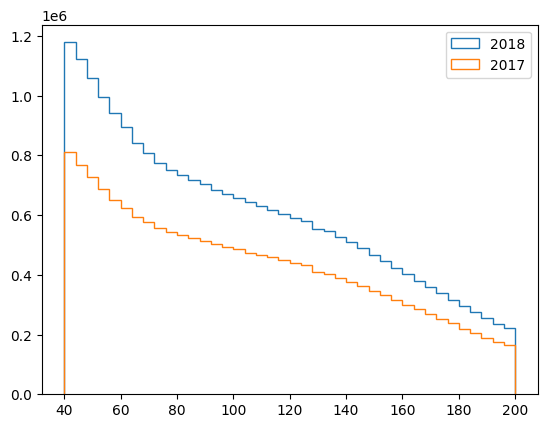

In [49]:
plt.hist(data2018.msoftdrop, bins=40, histtype='step', label='2018')
plt.hist(data2017.msoftdrop, bins=40, histtype='step', label='2017')
plt.legend()
plt.show()

In [54]:
17543265/24235300

0.7238724092542695

In [55]:
41.5/59.8

0.6939799331103679